<a href="https://colab.research.google.com/github/Plashka320/Stat_prack_HW_VyuzhaninPD_2025/blob/main/itogovaya_pabota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#Датасет: New York City Airbnb Open Data (аренда жилья в Нью-Йорке )
[Сам датасет](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=New_York_City_.png)

###Цели:


*   Определение факторов, влияющих на стоимость аренды (например, местоположение, тип жилья, доступность удобств)
*    Исследование распределения предложений аренды по районам Нью-Йорка.
*    Выявление наиболее востребованных типов жилья или районов среди арендаторов.
*   Подготовка данных для создания модели прогнозирования цен на аренду.(Как будет вести себя цены в зависимости от района, цены, площади и тд)

В идеале я хочу сделать модель которая по заданным параметрам будет мне выдавать "справедливую цену" на жилье. Например так же как это сделоно на Циан. там есть "Оценка циан" она показывает насколько выше или нирже рынка прожавец уцстановил цену.

###Основные сложности:

*



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv("/content/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape
data_columns = df.columns
data_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month
count,48895.000000,48895.000000,48895.000000,38843.000000
mean,152.720687,7.029962,23.274466,1.373221
std,240.154170,20.510550,44.550582,1.680442
min,0.000000,1.000000,0.000000,0.010000
25%,69.000000,1.000000,1.000000,0.190000
50%,106.000000,3.000000,5.000000,0.720000
75%,175.000000,5.000000,24.000000,2.020000
max,10000.000000,1250.000000,629.000000,58.500000


**Очистка данных**

In [ ]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool


In [ ]:
df[duplicates]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Нет дубликатов

In [ ]:
 df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
missing_values_count = df.isna().sum()
print(missing_values_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


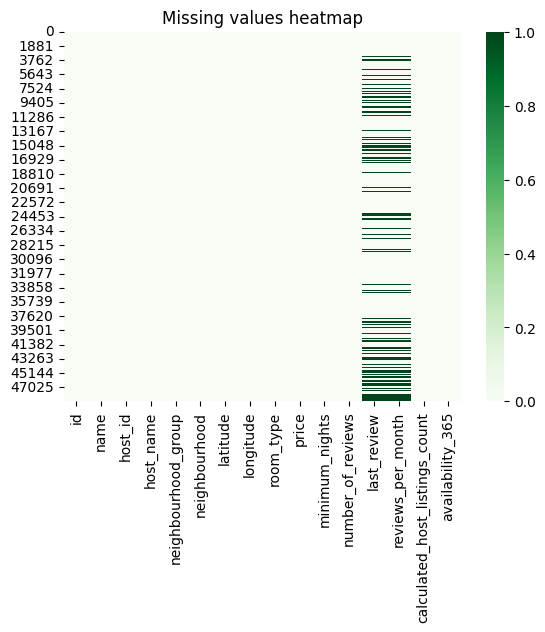

In [ ]:
sns.heatmap(df.isnull(), cmap = 'Greens')
plt.title('Missing values heatmap')
plt.show()

В столбцах last_review, reviews_per_month много пропущенных жанных.  

Строк, в которых пропушено значение last_review много. Поэтому будет ошибкой удалить все строки не содержащие данных last_review. Можно заменить, например, на самую раннюю дату. Или указать не существующую дате eg 1900-01-01. Я просто удалю этот стоблец. для предсказания цены он нее важен.

In [ ]:
df.drop('last_review', axis=1, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365.000000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355.000000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194.000000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,112.781327


Посмотрим на колонку reviews_per_month

In [ ]:
df[df['reviews_per_month'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365.000000
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249.000000
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,112.781327
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365.000000
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365.000000


Столбец reviews_per_month и number_of_reviews = 0. Могут быть зависимы. ТО есть когда reviews_per_month = NaN то number_of_reviews = 0. Проверим эту г ипотезу

In [ ]:
num_missing_reviews = df['reviews_per_month'].isnull().sum()
num_reviews_zero = np.sum(df['number_of_reviews']==0)
print(num_missing_reviews == num_reviews_zero)

True


Гипотеза подтвердилась. Заполняем reviews_per_month нулями.

In [ ]:
df['reviews_per_month'].fillna(0, inplace = True)
df[df['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
df[df['availability_365'] == 0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


Заменяем нули в столбце availability_365 на среднее значение.

In [ ]:
mean_availability = df['availability_365'].mean()
df.loc[df['availability_365'] == 0, 'availability_365'] = mean_availability
df[df['availability_365'] == 0]

<ipython-input-23-70ea027e0f17>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '112.78132733408324' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['availability_365'] == 0, 'availability_365'] = mean_availability


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Корреляционный аналз

In [ ]:
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
df_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.075460
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.136297
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.082605
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.024539
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.215229
availability_365,0.075460,0.136297,0.082605,0.024539,0.215229,1.000000


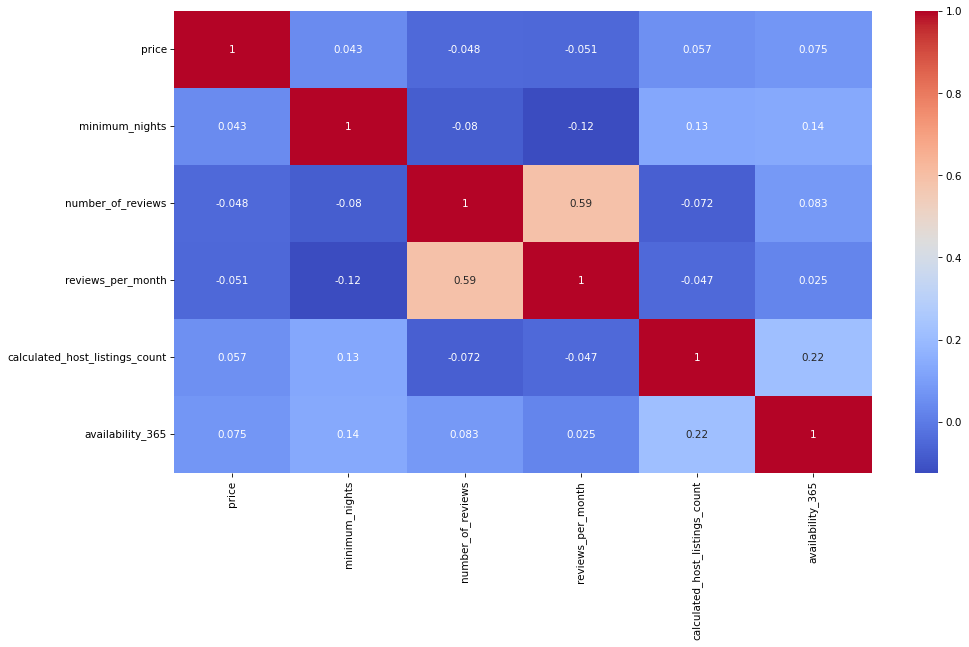

In [ ]:
plt.subplots(figsize = (15,8), dpi = 75)
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
import folium
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

# Загрузка данных
df = pd.read_csv('AB_NYC_2019.csv')

# Очистка данных
df = df[(df['price'] >= 10) & (df['price'] <= 1000)]
df = df.dropna()

# Кодирование категориальных признаков
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# Обучение модели
X = df.drop(['price', 'name', 'host_name', 'last_review'], axis=1)
y = df['price']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Добавление предсказаний в DataFrame
df['predicted_price'] = model.predict(X)

# Создание базовой карты
map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Функция для обработки кликов
def on_map_click(event):
    lat, lng = event['latlng']['lat'], event['latlng']['lng']
    radius_km = 1.0  # Радиус поиска в километрах

    # Функция расчета расстояния
    def simple_distance(lat1, lon1, lat2, lon2):
        LAT_KM = 111.32
        LON_KM = 111.32 * abs(cos(radians((lat1 + lat2) / 2)))
        dlat = (lat2 - lat1) * LAT_KM
        dlon = (lon2 - lon1) * LON_KM
        return sqrt(dlat**2 + dlon**2)

    # Фильтрация данных в пределах радиуса
    filtered_data = df[
        df.apply(lambda x: simple_distance(lat, lng, x['latitude'], x['longitude']) <= radius_km, axis=1)
    ]

    if filtered_data.empty:
        print("No data available in this area.")
        return

    # Расчет средней цены
    predicted_prices = filtered_data['predicted_price']
    predicted_price = predicted_prices.mean()

    # Отображение результата
    print(f"Predicted Price: ${predicted_price:.2f}")

# Привязка обработчика кликов к карте
map.add_child(folium.LatLngPopup())  # Добавляем возможность кликать на карту
map.keep_in_front = True

# Отображение карты
display(map)

<ipython-input-73-f09446d1c557>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
<ipython-input-73-f09446d1c557>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes
